In [2]:
#Importing various modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

import seaborn as sns

In [3]:
data=pd.read_csv("data.csv") #reads the csv file
X=data.iloc[:,1:] #leaves out the first column and takes an array of other columns as X
y=data.iloc[:,0] #assigns label i.e. the first column as Y

scaler=StandardScaler() #a standardizing tool for better results
X=scaler.fit_transform(X) #fits the data to unit variance(shows how spread out our data is)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #training and testing data is divided into 80/20 ratio

model=LogisticRegression(max_iter=2059,random_state=52) #loads the model and sets the max iterations for better results
model.fit(X_train,y_train)#fits the training dataset into the model

LogisticRegression(max_iter=2059, random_state=52)

In [5]:
y_predicted = model.predict(X_test)#predicts the results
y_predicted_probability=model.predict_proba(X_test)#gives the predicted probability for each class

accuracy=accuracy_score(y_test,y_predicted) #returns the accuracy of the model
loss=log_loss(y_test,y_predicted_probability) #how far the predicted values are from original values

print("Accuracy:",accuracy)
print("Log loss",loss)

Accuracy: 0.8426666666666667
Log loss 0.5165413484907294


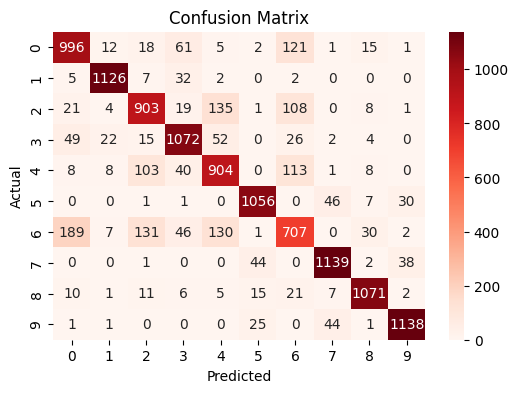

In [6]:
#prints a confusion matrix which shows the predicted vs actual results values
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='d',cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

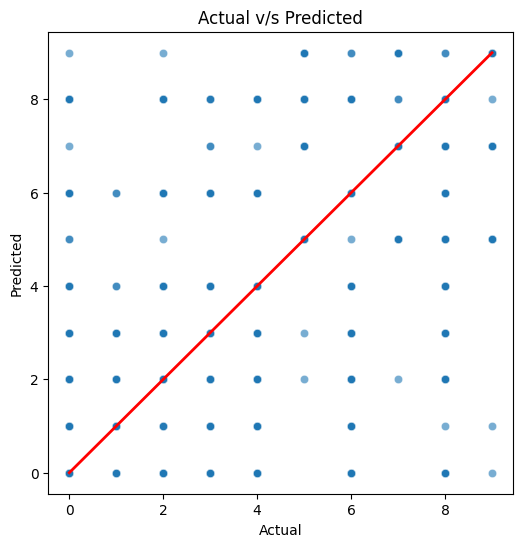

In [7]:
#plots a scatter plor of actual vs predicted values for better understanding
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test,y=y_predicted,alpha=0.6) #plots actual results in x axis and predicted results in y axis
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r-',lw=2)  #determines the ranges for x and y axises
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")
plt.show()

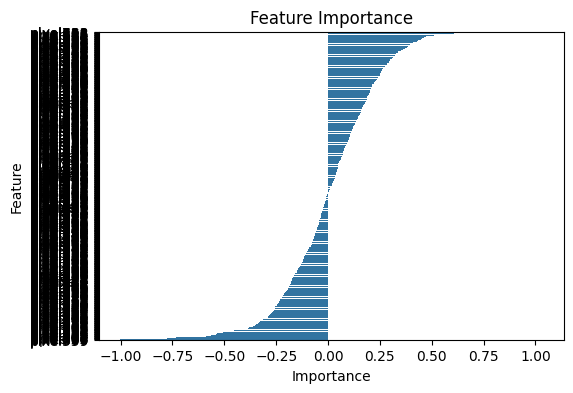

In [8]:
feature_imp=pd.DataFrame({'Feature':data.columns[1:],'Importance':model.coef_[0]}) #retrieves the coeffs from the logistic model and stores them under "importance"
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)#sorts them in descending

plt.figure(figsize=(6,4))  
sns.barplot(x='Importance',y='Feature',data=feature_imp)
plt.yticks(rotation=0)  
plt.title("Feature Importance")
plt.show()

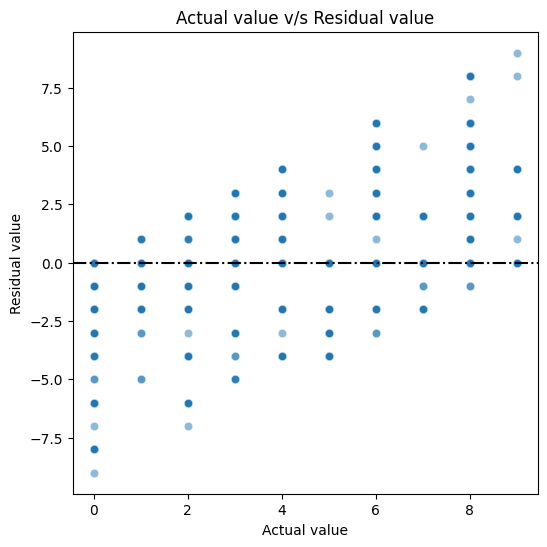

In [9]:
#shows a plot of residual vs actual value of the results
#if the point is above zero, the model under predicted (-ve)
#if the point is below zero then the model over predicted (+ve)

residual_data=y_test-y_predicted

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test,y=residual_data,alpha=0.5) #asigns the values for x and y axises
plt.axhline(y=0,color='black',linestyle='-.') #perfect results on this line
plt.xlabel("Actual value")
plt.ylabel("Residual value")
plt.title("Actual value v/s Residual value")
plt.show()

In [ ]:
#displaying the XAI graphical analysis
#lime-linear local interpretable model agnostic explanations
import lime
import lime.lime_tabular
#Lime tabular explainer is created for analysing tabular data
#X_train data is passed into the explainer, which under the columns from the dataset explans the model
#classification has been used to categorize the predicted probabilities 

explainer=lime.lime_tabular.LimeTabularExplainer(
X_train,feature_names=data.columns[1:],mode="classification"
)

html_explanation=exp.as_html()
exp=explainer.explain_instance(X_train[0],model.predict_proba) #main thing which explains the data received from our model
with open("lime_explanation.html","w",encoding="utf-8") as f:
    f.write(html_explanation)